In [1]:
ts=tsc.loadImagesAsSeries('/mnt/downloads/vidthentone_0', inputformat='tif-stack',blockSize="10M")
ts.cache()

In [141]:
ss = ts.toSpatialSeries()

In [142]:
cr = ss.localCorr(neighborhood=3)

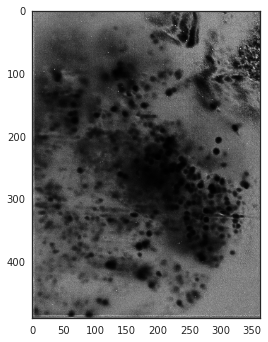

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')
img = cr.pack()
plt.imshow(img)

In [143]:
from thunder import PCA, RegressionModel

In [144]:
norm=ts.normalize(baseline='percentile')

In [145]:
filtered=norm.filterOnValues(lambda x: numpy.amax(x) > 0.2)

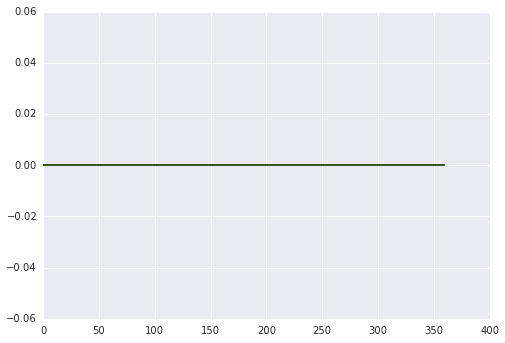

In [146]:
from thunder import KMeans, Colorize
modelK=KMeans(k=30).fit(norm)
newclrs = Colorize.optimize(modelK.centers, ascmap=True)
sns.set_style('darkgrid')
plt.gca().set_color_cycle(newclrs.colors)
plt.plot(modelK.centers.T);

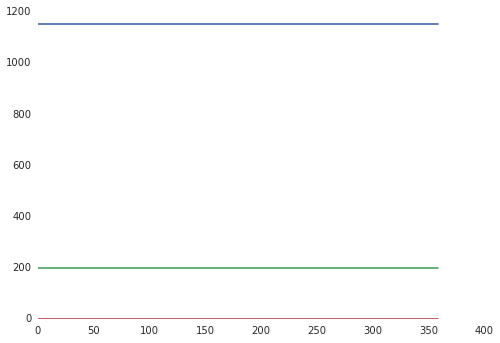

In [147]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
plt.plot(ts.max());
plt.plot(ts.mean());
plt.plot(ts.min());

In [135]:
tts = norm.toTimeSeries()

AttributeError: 'Normalize' object has no attribute 'toTimeSeries'

In [83]:
import numpy as np
vis1=np.zeros((360),dtype=np.int)
vis1.flat[30:80]=1

In [84]:
ccr=tts.crossCorr(vis1, lag=5)

In [85]:
from thunder import PCA
modelcc=PCA(k=3).fit(ccr)

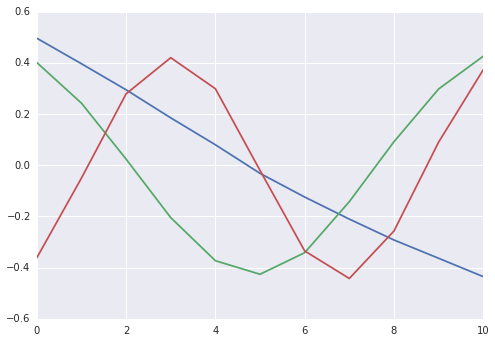

In [86]:
sns.set_style('darkgrid')
plt.plot(modelcc.comps.T);

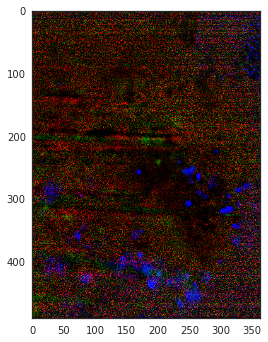

In [87]:
imgs = modelcc.scores.pack()
from thunder import Colorize
from numpy import amax
maps = Colorize(totype='indexed', colors=[ "blue","green" , "red"], scale=2).images(imgs)
sns.set_style('white')
plt.imshow(maps);

In [88]:
vis2=np.zeros((360),dtype=np.int)
vis2.flat[90:120]=1

In [89]:
ccr2=tts.crossCorr(vis2, lag=5)

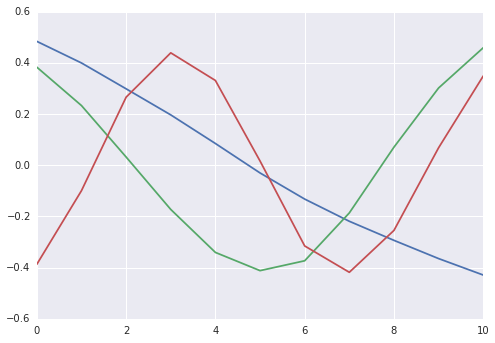

In [90]:
from thunder import PCA
modelcc2=PCA(k=3).fit(ccr2)
sns.set_style('darkgrid')
plt.plot(modelcc2.comps.T)

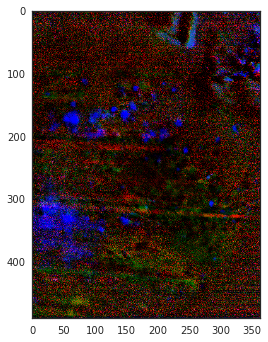

In [91]:
imgs2 = modelcc2.scores.pack()
maps2 = Colorize(totype='indexed', colors=[ "blue","green" , "red"], scale=2).images(imgs2)
sns.set_style('white')
plt.imshow(maps2);

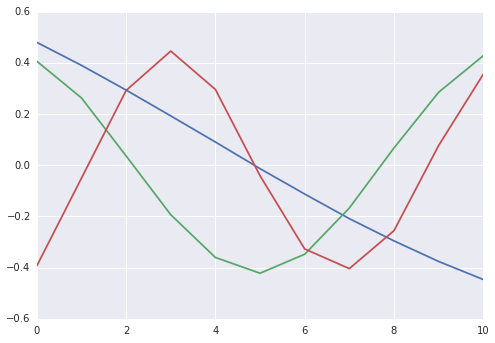

In [92]:
vis3=np.zeros((360),dtype=np.int)
vis3.flat[130:150]=1
ccr3=tts.crossCorr(vis3, lag=5)
modelcc3=PCA(k=3).fit(ccr3)
sns.set_style('darkgrid')
plt.plot(modelcc3.comps.T)

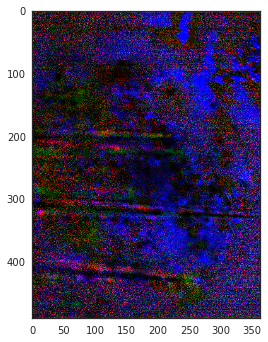

In [93]:
imgs3 = modelcc3.scores.pack()
maps3 = Colorize(totype='indexed', colors=[ "blue","green" , "red"], scale=2).images(imgs3)
sns.set_style('white')
plt.imshow(maps3);

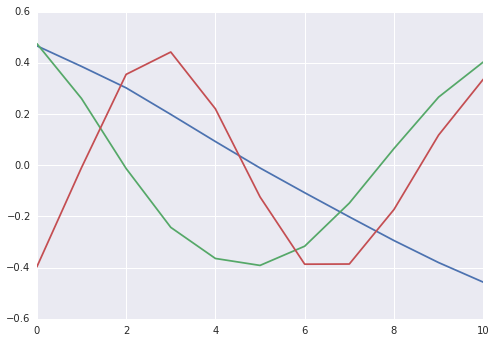

In [94]:
vis4=np.zeros((360),dtype=np.int)
vis4.flat[160:210]=1
ccr4=tts.crossCorr(vis4, lag=5)
modelcc4=PCA(k=3).fit(ccr4)
sns.set_style('darkgrid')
plt.plot(modelcc4.comps.T)

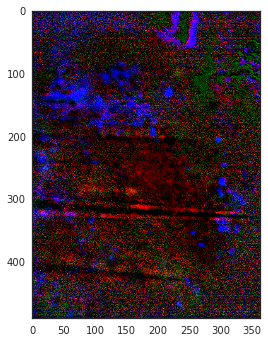

In [95]:
imgs4 = modelcc4.scores.pack()
maps4 = Colorize(totype='indexed', colors=[ "blue","green" , "red"], scale=2).images(imgs4)
sns.set_style('white')
plt.imshow(maps4);

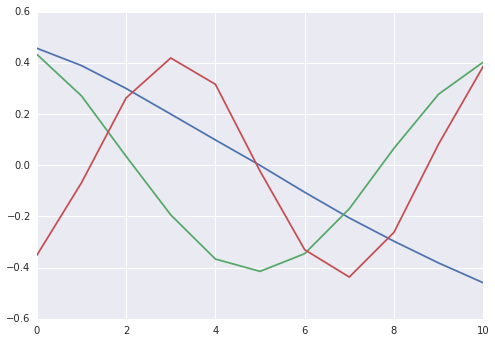

In [96]:
aud=np.zeros((360),dtype=np.int)
aud.flat[300:340]=1
ccra=tts.crossCorr(aud, lag=5)
modelcca=PCA(k=3).fit(ccra)
sns.set_style('darkgrid')
plt.plot(modelcca.comps.T)

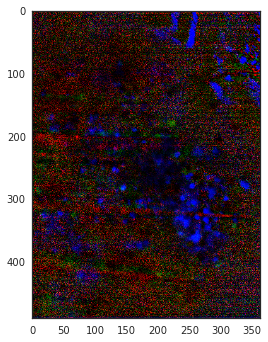

In [97]:
imgsa = modelcca.scores.pack()
mapsa = Colorize(totype='indexed', colors=[ "blue","green" , "red"], scale=2).images(imgsa)
sns.set_style('white')
plt.imshow(mapsa);

In [98]:
tot=np.zeros((360),dtype=np.int)
tot.flat[300:340]=1
tot.flat[160:210]=1
tot.flat[130:150]=1
tot.flat[90:120]=1
tot.flat[30:80]=1

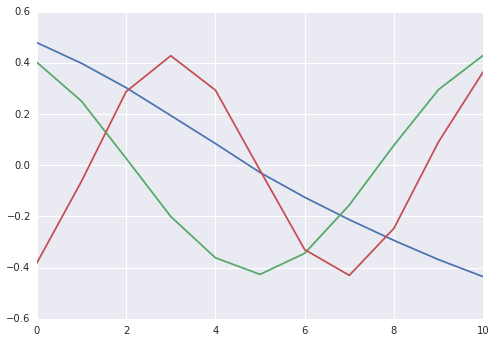

In [99]:
ccrt=tts.crossCorr(tot, lag=5)
modelcct=PCA(k=3).fit(ccrt)
sns.set_style('darkgrid')
plt.plot(modelcct.comps.T)

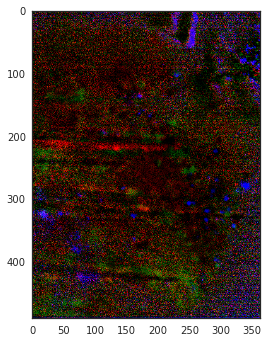

In [100]:
imgst = modelcct.scores.pack()
mapst = Colorize(totype='indexed', colors=[ "blue","green" , "red"], scale=2).images(imgst)
sns.set_style('white')
plt.imshow(mapst);

In [101]:
ccrtot=tts.crossCorr(tot, lag=3)

In [102]:
imgtot=ccrtot.pack()

In [103]:
maptot=Colorize(totype='indexed', colors=[ "red", "peru",  "Purple", "blue", "cornflowerblue", "Aqua", "green"], scale=2).images(imgtot)

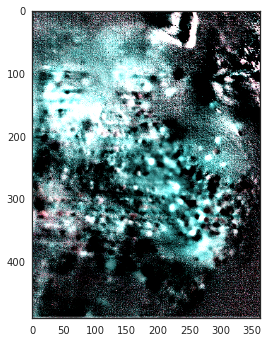

In [104]:
sns.set_style('white')
plt.imshow(maptot)

In [105]:
from thunder import RegressionModel

In [106]:
ts=ts.detrend('linear')

In [107]:
norm=ts.normalize(baseline='percentile')

In [108]:
from numpy import sum, outer, inner, mean, shape, dot, transpose, concatenate, ones, asarray
shape(aud)

(360,)

In [109]:
test = np.zeros((5,360),dtype=np.int)

In [110]:
test[0,29:79]=1
test[1,89:119]=1
test[2,129:150]=1
test[3,159:209]=1
test[4,299:339]=1

In [4]:
model = RegressionModel.load(test, "linear")

In [112]:
results = model.fit(tts)

In [113]:
results.select('betas').first()

((0, 0, 0),
 array([ 0.07926603, -0.13981365,  0.10640515,  0.22000677,  0.20642653]))

In [114]:
pca=PCA(k=3)
pca.fit(results.select('betas'))

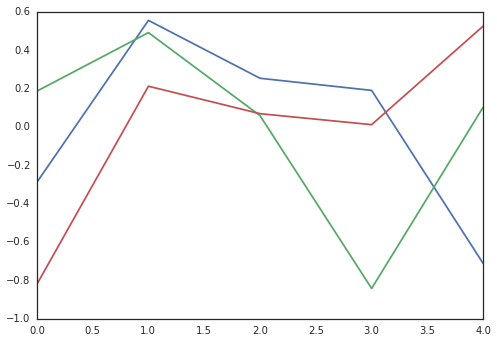

In [115]:
plt.plot(pca.comps.T)

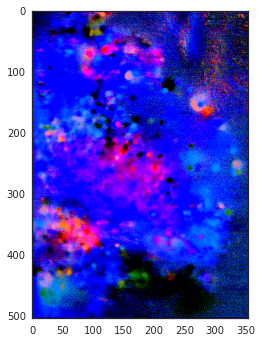

In [9]:
from thunder import Colorize
img = pca.scores.pack()
maps = Colorize(totype='indexed', colors=[ "blue","green" , "red"], scale=2).images(img)
sns.set_style('white')
plt.imshow(maps)

In [10]:
betas=results.select('betas').pack()

In [118]:
betas[0,]

array([[ 0.07926603,  0.00310807, -0.00423513, ...,  0.02097961,
        -0.01218455, -0.02207081],
       [ 0.05878005, -0.00348706,  0.00185835, ...,  0.01607619,
         0.00630485, -0.02932945],
       [ 0.06080388, -0.00222138, -0.0051894 , ..., -0.01382341,
        -0.00284679, -0.02021909],
       ..., 
       [ 0.06862612, -0.00146865, -0.00106314, ...,  0.00286786,
        -0.00193336,  0.00912689],
       [ 0.04882103,  0.09577467,  0.10495486, ...,  0.10686023,
         0.10822413,  0.15682281],
       [ 0.01279842,  0.00528149,  0.00715315, ...,  0.00550595,
         0.01048605,  0.00884962]])

In [119]:
shape(betas)

(5, 489, 363)

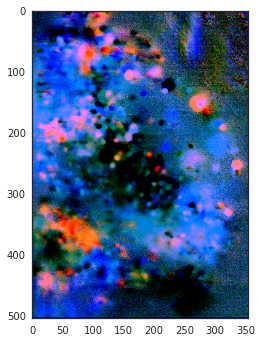

In [11]:
maps = Colorize(totype='indexed', colors=[ "red","green", "blue"], scale=2).images(betas[0:3,])
plt.imshow(maps)

In [121]:
beta1=betas[0,]

In [122]:
shape(beta1)

(489, 363)

<matplotlib.colorbar.Colorbar instance at 0x7fe30177d878>

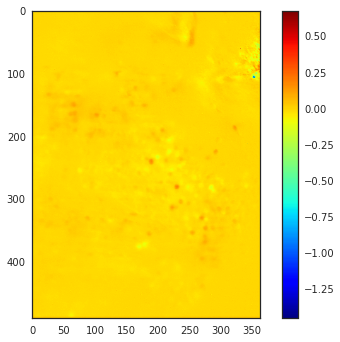

In [123]:
imgplot = plt.imshow(beta1)
imgplot.set_cmap('jet')
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7fe301393050>

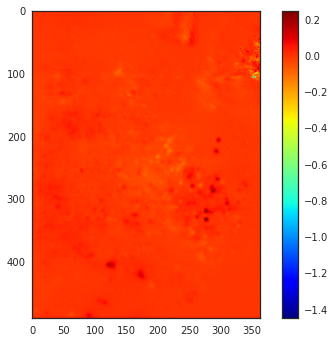

In [124]:
beta1=betas[4,]
sns.set_style('white')
imgplot = plt.imshow(beta1)
imgplot.set_cmap('jet')
plt.colorbar()

In [14]:
from numpy import amin, amax, ravel
vmin = amin(betas)
vmax = amax(betas)

In [13]:
from matplotlib.pyplot import figure, show, axes, sci
from matplotlib import cm, colors
norm = colors.Normalize(vmin=vmin, vmax=vmax)

NameError: name 'vmin' is not defined

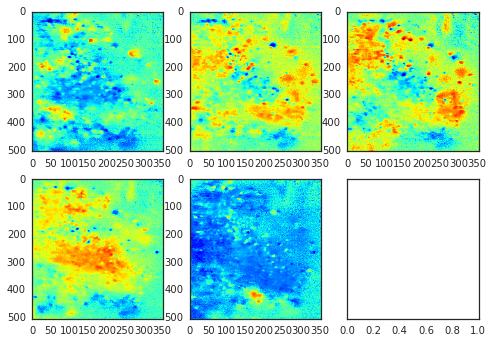

In [15]:
fig = figure(dpi=300)
plt.subplots(2, 3, sharex=True, sharey=True)
for i in range(0,5):
    n=betas[i,]
    plt.subplot(2, 3, i+1)
    plt.imshow(n, vmin=vmin, vmax=vmax, cmap='jet', aspect='auto')

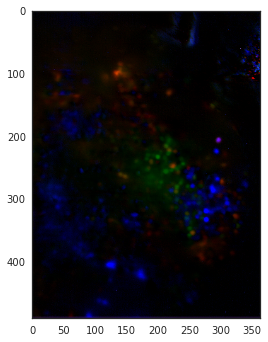

In [128]:
maps = Colorize(totype='indexed', colors=[ "red","green", "blue"], scale=2).images(betas[2:5,])
plt.imshow(maps)

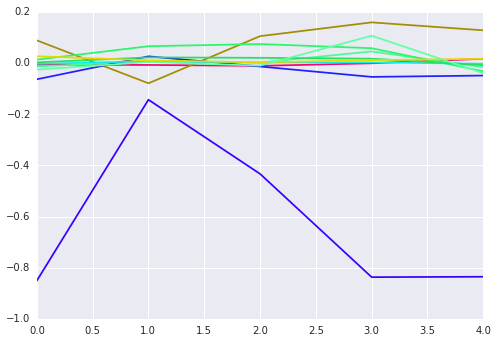

In [129]:
from thunder import KMeans, Colorize
modelK=KMeans(k=10).fit(results.select('betas'))
newclrs = Colorize.optimize(modelK.centers, ascmap=True)
sns.set_style('darkgrid')
plt.gca().set_color_cycle(newclrs.colors)
plt.plot(modelK.centers.T);

In [148]:
data=tsc.loadImages('/mnt/downloads/vidthentone_100b', inputformat='tif-stack')

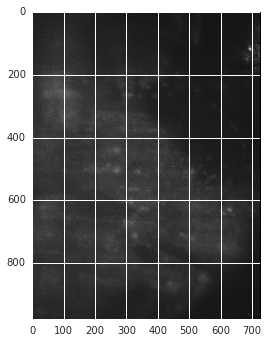

In [149]:
projs = data.maxProjection(axis=2)
img = projs.first()[1]
plt.imshow(img, cmap='gray');

In [2]:
zs=ts.zscore()

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from thunder import PCA, RegressionModel
import numpy as np
test = np.zeros((5,360),dtype=np.int)
test[0,29:79]=1
test[1,89:119]=1
test[2,129:150]=1
test[3,159:209]=1
test[4,299:339]=1

In [5]:
results = model.fit(zs)

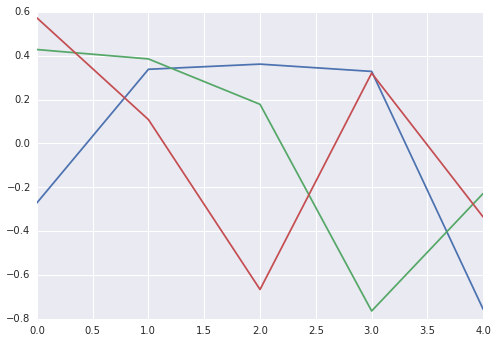

In [6]:
pca=PCA(k=3)
pca.fit(results.select('betas'))
plt.plot(pca.comps.T)